<a href="https://colab.research.google.com/github/Dukzf1v/AIO_Exercises/blob/main/M04W01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Question 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab import files

In [4]:
data = files.upload()

Saving advertising.csv to advertising.csv


In [5]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [6]:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [7]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)


In [10]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):

    result = w1*x1 + w2*x2 + w3*x3 + b

    return result

def compute_loss_mse(y_hat, y):

    result = (y_hat - y)**2

    return result

def compute_loss_mae(y_hat, y):

    result = abs(y_hat - y)

    return result

# compute gradient
def compute_gradient_wi(xi, y, y_hat):

    dl_dwi = 2*(y_hat - y)*xi

    return dl_dwi

def compute_gradient_b(y, y_hat):

    dl_db = 2*(y_hat - y)

    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):

    wi = wi - lr*dl_dwi

    return wi

def update_weight_b(b, dl_db, lr):

    b = b - lr*dl_db

    return b

In [11]:
def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

In [12]:
#Multiple choices:
#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [13]:
#Multiple choices:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [15]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [16]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [18]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [17]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)

0.50001


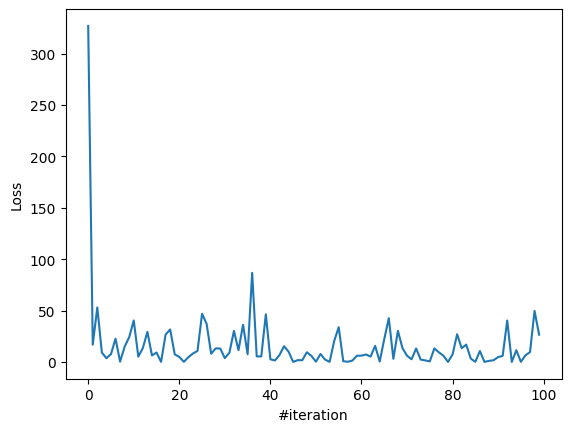

In [19]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [20]:
#Multiple choices:
#Question 8:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [21]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


###Question 3

In [32]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mae(y, y_hat)

            # Accumulate loss to total loss
            loss_total += loss

            # Compute gradients for w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing all samples
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Logging average loss
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)


0.06710990754044266 0.15756173831487585 0.029619799386084403


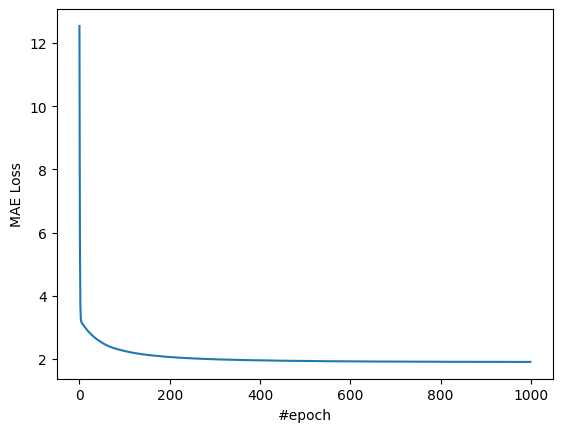

In [33]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000, 1e-5)
print(w1,w2,w3)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [34]:
#Multiple choices:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


###Question 4

In [35]:
import numpy as np

def get_column(data, index):
    """Extracts a column from the dataset."""
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    # Load data from CSV file
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Extract columns
    tv_data = get_column(data, 0)       # TV data (index = 0)
    radio_data = get_column(data, 1)     # Radio data (index = 1)
    newspaper_data = get_column(data, 2) # Newspaper data (index = 2)
    sales_data = get_column(data, 3)     # Sales data (index = 3)

    # Prepare input features and output labels for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y


In [37]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

print(initialize_params())

[0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]


In [60]:
def predict(X_features, weights):
  return sum([f*W for f, W in zip(X_features, weights)])

def compute_loss(y_hat, y):
  return (y_hat - y)**2

def compute_gradient(X_features, y, y_hat):
   dl_dweights = [2*(y_hat - y)*f for f in X_features]
   return dl_dweights

def update_weight(weights, dl_dweights, lr):
  weights = [w - lr*dl for w, dl in zip(weights, dl_dweights)]
  return weights


In [63]:


def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()  # Initialize parameters
    N = len(y_output)  # Number of samples

    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]  # Use y_output instead of sales_data

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient w.r.t. weights
            dl_dweights = compute_gradient(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

        # Logging the average loss for this epoch
            losses.append(loss)  # Store the loss of the last sample for that epoch

    return weights, losses


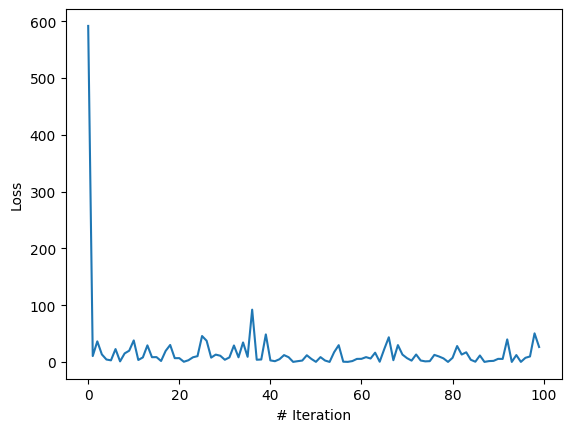

In [64]:
# Example usage
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=100, lr=1e-5)

# Plotting the loss
plt.plot(L[0:100])  # Plot the first 100 losses
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()

In [71]:
X , y = prepare_data ('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
print ( L [9999])

31.339223408109948
